# Main Jupyter Noootbook

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from nlp_preprocessing import VIA_GoGo



## EDA

In [5]:
tweet_df = pd.read_csv('data/db_tweet_emotion.csv', encoding= 'unicode_escape')

In [6]:
tweet_df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [7]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [8]:
tweet = tweet_df['tweet_text']
directed = tweet_df['emotion_in_tweet_is_directed_at']
emotion = tweet_df['is_there_an_emotion_directed_at_a_brand_or_product']

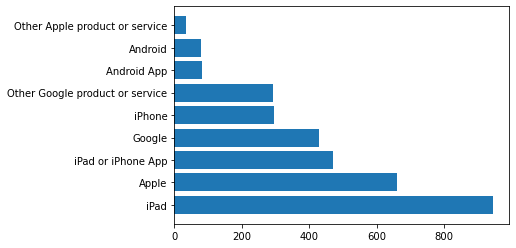

In [9]:
plt.barh(directed.value_counts().index, directed.value_counts().values);

In [10]:
directed.value_counts().sum()

3291

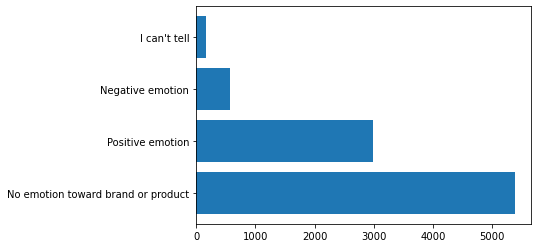

In [11]:
plt.barh(emotion.value_counts().index, emotion.value_counts().values);

In [12]:
emotion.value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

## Clean Up & Tokenize

In [13]:
# Instantiating tokenizer
tokenizer = RegexpTokenizer(r"(?u)\b\w\w+\b")

# Create a list of stopwords in English
sw = stopwords.words('english')


In [14]:
vg = VIA_GoGo()

In [15]:

clean_df = vg.clean_tokenizer(tweet_df, tokenizer, sw)
clean_df


,tweet_text,directed_at,emotion,emotion_num,brand,tweet_text_tokenized,joined_tokens
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,Negative emotion,-1,Apple,"[wesley83, 3g, iphone, hr, tweeting, rise_aust...",wesley83 3g iphone hr tweeting rise_austin dea...
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,Positive emotion,1,Apple,"[jessedee, know, fludapp, awesome, ipad, iphon...",jessedee know fludapp awesome ipad iphone app ...
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,Positive emotion,1,Apple,"[swonderlin, wait, ipad, also, sale, sxsw]",swonderlin wait ipad also sale sxsw
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,-1,Apple,"[sxsw, hope, year, festival, crashy, year, iph...",sxsw hope year festival crashy year iphone app...
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,Positive emotion,1,Google,"[sxtxstate, great, stuff, fri, sxsw, marissa, ...",sxtxstate great stuff fri sxsw marissa mayer g...
...,...,...,...,...,...,...,...
9084,"@mention yup, but i don't have a third app yet...",NaN,No emotion toward brand or product,0,Google,"[mention, yup, third, app, yet, android, sugge...",mention yup third app yet android suggestion s...
9085,ipad everywhere. #sxsw {link},iPad,Positive emotion,1,Apple,"[ipad, everywhere, sxsw, link]",ipad everywhere sxsw link
9086,"wave, buzz... rt @mention we interrupt your re...",NaN,No emotion toward brand or product,0,Google,"[wave, buzz, rt, mention, interrupt, regularly...",wave buzz rt mention interrupt regularly sched...
9087,"google's zeiger, a physician never reported po...",NaN,No emotion toward brand or product,0,Google,"[google, zeiger, physician, never, reported, p...",google zeiger physician never reported potenti...


In [16]:
clean_df.brand.value_counts()

Apple     6093
Google    2996
Name: brand, dtype: int64

In [17]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9089 entries, 0 to 9088
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   tweet_text            9089 non-null   object
 1   directed_at           3291 non-null   object
 2   emotion               9089 non-null   object
 3   emotion_num           9089 non-null   int64 
 4   brand                 9089 non-null   object
 5   tweet_text_tokenized  9089 non-null   object
 6   joined_tokens         9089 non-null   object
dtypes: int64(1), object(6)
memory usage: 497.2+ KB


In [18]:
X_train, X_test, y_train, y_test = train_test_split(clean_df['joined_tokens'], 
                                                    clean_df['emotion_num'], 
                                                    test_size= 0.25,
                                                    random_state= 5)

In [19]:
# Using Linear Support Vector Machine
nb1 = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SGDClassifier()),
              ])
nb1.fit(X_train, y_train)

y_pred = nb1.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))


accuracy 0.710074791025077


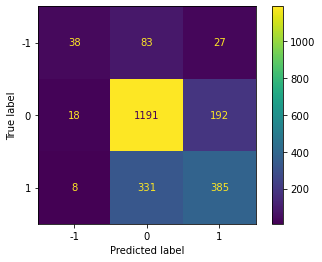

In [20]:
plot_confusion_matrix(nb1, X_test, y_test)

In [21]:
# Using Naive Bayes
nb2 = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb2.fit(X_train, y_train)

y_pred = nb2.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.6695996480422349


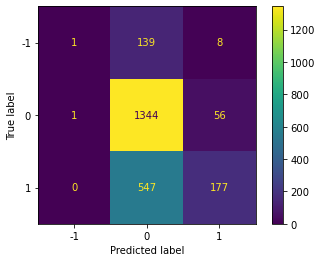

In [23]:
plot_confusion_matrix(nb2, X_test, y_test)

In [24]:
# Using Logistic Regression
nb3 = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression(n_jobs=5)),
              ])
nb3.fit(X_train, y_train)

y_pred = nb3.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.6929168499780026


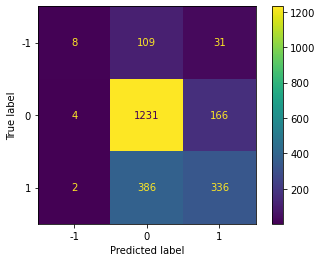

In [25]:
plot_confusion_matrix(nb3, X_test, y_test);

### Graphs for Cleaned Data

In [26]:
clean_df

,tweet_text,directed_at,emotion,emotion_num,brand,tweet_text_tokenized,joined_tokens
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,Negative emotion,-1,Apple,"[wesley83, 3g, iphone, hr, tweeting, rise_aust...",wesley83 3g iphone hr tweeting rise_austin dea...
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,Positive emotion,1,Apple,"[jessedee, know, fludapp, awesome, ipad, iphon...",jessedee know fludapp awesome ipad iphone app ...
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,Positive emotion,1,Apple,"[swonderlin, wait, ipad, also, sale, sxsw]",swonderlin wait ipad also sale sxsw
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,-1,Apple,"[sxsw, hope, year, festival, crashy, year, iph...",sxsw hope year festival crashy year iphone app...
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,Positive emotion,1,Google,"[sxtxstate, great, stuff, fri, sxsw, marissa, ...",sxtxstate great stuff fri sxsw marissa mayer g...
...,...,...,...,...,...,...,...
9084,"@mention yup, but i don't have a third app yet...",NaN,No emotion toward brand or product,0,Google,"[mention, yup, third, app, yet, android, sugge...",mention yup third app yet android suggestion s...
9085,ipad everywhere. #sxsw {link},iPad,Positive emotion,1,Apple,"[ipad, everywhere, sxsw, link]",ipad everywhere sxsw link
9086,"wave, buzz... rt @mention we interrupt your re...",NaN,No emotion toward brand or product,0,Google,"[wave, buzz, rt, mention, interrupt, regularly...",wave buzz rt mention interrupt regularly sched...
9087,"google's zeiger, a physician never reported po...",NaN,No emotion toward brand or product,0,Google,"[google, zeiger, physician, never, reported, p...",google zeiger physician never reported potenti...


In [143]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9089 entries, 0 to 9088
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   tweet_text            9089 non-null   object
 1   directed_at           3291 non-null   object
 2   emotion               9089 non-null   object
 3   emotion_num           9089 non-null   int64 
 4   brand                 9089 non-null   object
 5   tweet_text_tokenized  9089 non-null   object
 6   joined_tokens         9089 non-null   object
 7   pos_neg_neutral       9089 non-null   bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 506.1+ KB


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from wordcloud import WordCloud
%matplotlib inline

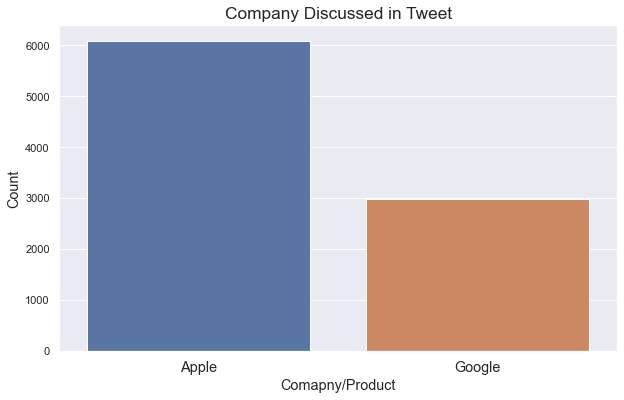

In [31]:
#visualize the counts of company discussed in tweets

sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.countplot(
    data=clean_df, 
    x="brand", order=clean_df["brand"].value_counts().index)

ax.set_title('Company Discussed in Tweet', fontsize='x-large')
ax.set_xlabel('Comapny/Product',fontsize='large')

ax.set_xticklabels(ax.get_xticklabels(),fontweight='light', fontsize='large')
ax.set_ylabel('Count',fontsize='large')

plt.show();

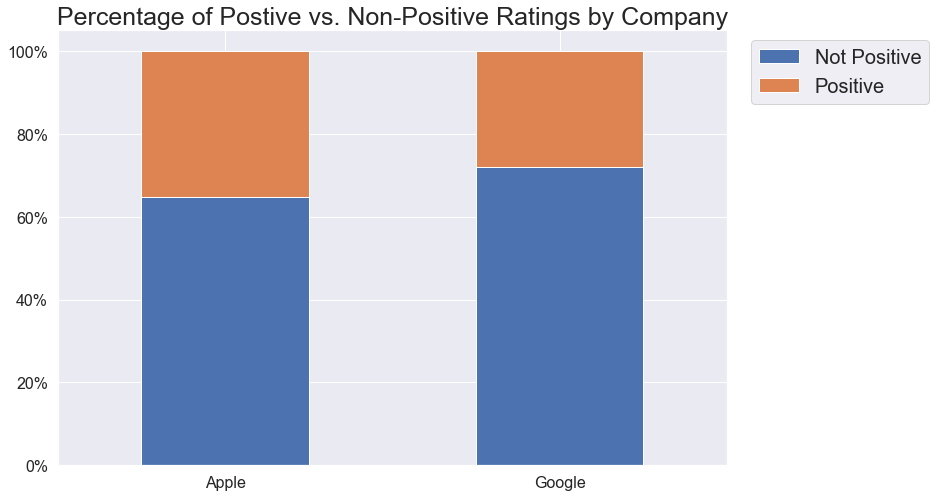

In [36]:
# visualize company/product mentioned by positive/non-positive emotion

clean_df['pos_neg_neutral']=clean_df['emotion_num'] == 1


clean_df.groupby(['brand','pos_neg_neutral']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, figsize=(12,8), legend="reverse")


plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.legend(bbox_to_anchor= (1.02, 1),prop = {'size' : 20},labels=("Not Positive", "Positive"))
plt.xlabel('')
plt.xticks(fontsize=16,rotation=0,fontweight='light')
plt.yticks(fontsize=16)
plt.title('Percentage of Postive vs. Non-Positive Ratings by Company', size=25)
plt.show()

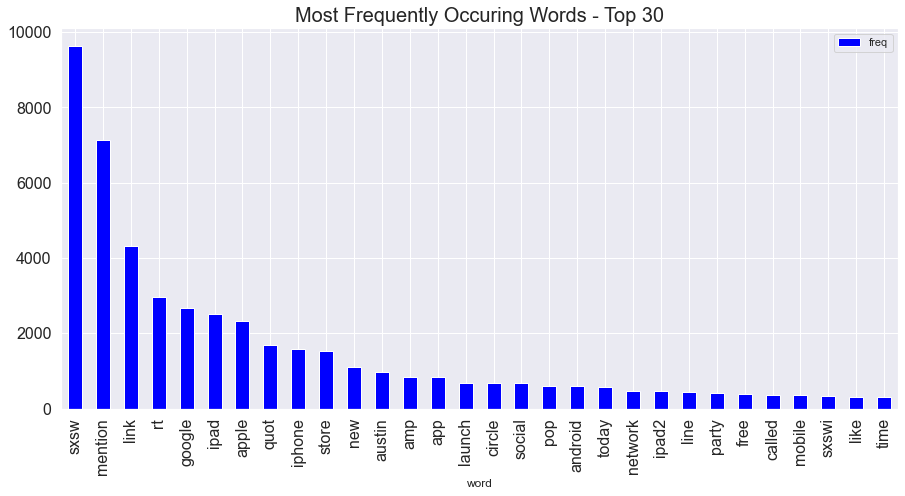

In [37]:
cv = CountVectorizer(stop_words = 'english')

words = cv.fit_transform(clean_df.joined_tokens)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')

plt.title("Most Frequently Occuring Words - Top 30", size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

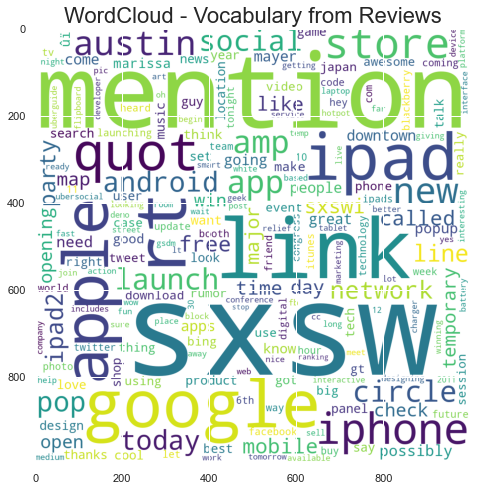

In [40]:
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22);

In [53]:
pos_df = clean_df[clean_df['emotion_num'] == 1]
neutral_df = clean_df[clean_df['emotion_num'] == 0]
neg_df = clean_df[clean_df['emotion_num'] == -1]

In [47]:
pos_df

,tweet_text,directed_at,emotion,emotion_num,brand,tweet_text_tokenized,joined_tokens,pos_neg_neutral
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,Positive emotion,1,Apple,"[jessedee, know, fludapp, awesome, ipad, iphon...",jessedee know fludapp awesome ipad iphone app ...,True
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,Positive emotion,1,Apple,"[swonderlin, wait, ipad, also, sale, sxsw]",swonderlin wait ipad also sale sxsw,True
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,Positive emotion,1,Google,"[sxtxstate, great, stuff, fri, sxsw, marissa, ...",sxtxstate great stuff fri sxsw marissa mayer g...,True
6,"#sxsw is just starting, #ctia is around the co...",Android,Positive emotion,1,Google,"[sxsw, starting, ctia, around, corner, googlei...",sxsw starting ctia around corner googleio hop ...,True
7,beautifully smart and simple idea rt @madebyma...,iPad or iPhone App,Positive emotion,1,Apple,"[beautifully, smart, simple, idea, rt, madebym...",beautifully smart simple idea rt madebymany th...,True
...,...,...,...,...,...,...,...,...
9069,@mention your iphone 4 cases are rad and ready...,iPhone,Positive emotion,1,Apple,"[mention, iphone, case, rad, ready, stop, tomo...",mention iphone case rad ready stop tomorrow ge...,True
9074,@mention your pr guy just convinced me to swit...,iPhone,Positive emotion,1,Apple,"[mention, pr, guy, convinced, switch, back, ip...",mention pr guy convinced switch back iphone gr...,True
9076,&quot;papyrus...sort of like the ipad&quot; - ...,iPad,Positive emotion,1,Apple,"[quot, papyrus, sort, like, ipad, quot, nice, ...",quot papyrus sort like ipad quot nice lol sxsw...,True
9082,i've always used camera+ for my iphone b/c it ...,iPad or iPhone App,Positive emotion,1,Apple,"[always, used, camera, iphone, image, stabiliz...",always used camera iphone image stabilizer mod...,True


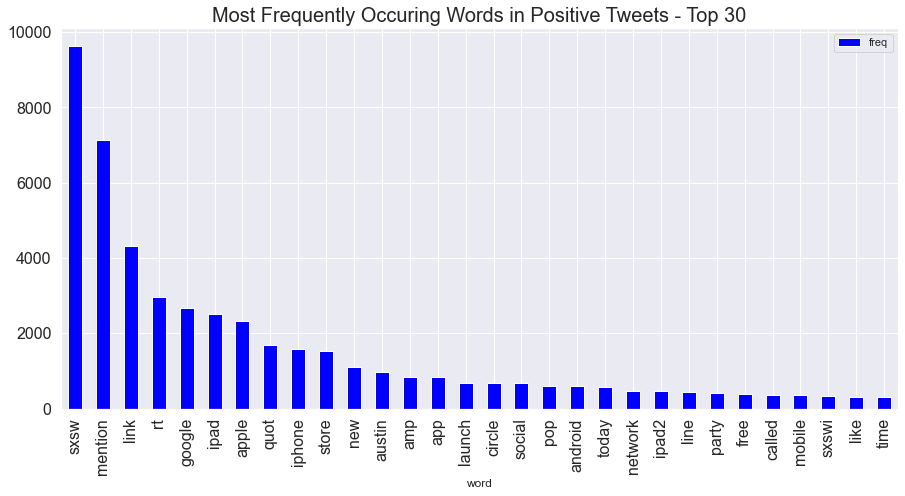

In [49]:
pos_words = cv.fit_transform(pos_df.joined_tokens)

pos_sum_words = pos_words.sum(axis=0)

pos_words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
pos_words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

pos_frequency = pd.DataFrame(pos_words_freq, columns=['word', 'freq'])

pos_frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')

plt.title("Most Frequently Occuring Words in Positive Tweets - Top 30", size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

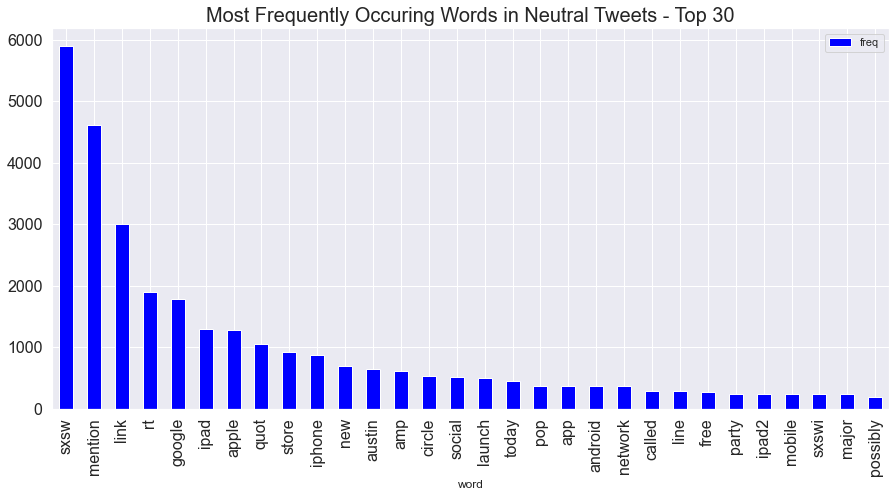

In [52]:
neutral_words = cv.fit_transform(neutral_df.joined_tokens)

neutral_sum_words = neutral_words.sum(axis=0)

neutral_words_freq = [(word, neutral_sum_words[0, i]) for word, i in cv.vocabulary_.items()]
neutral_words_freq = sorted(neutral_words_freq, key = lambda x: x[1], reverse = True)

neutral_frequency = pd.DataFrame(neutral_words_freq, columns=['word', 'freq'])

neutral_frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')

plt.title("Most Frequently Occuring Words in Neutral Tweets - Top 30", size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

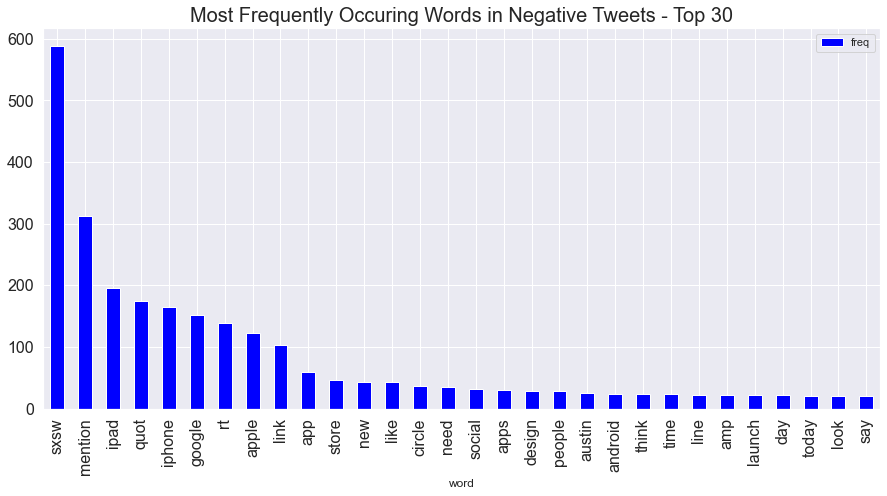

In [54]:
neg_words = cv.fit_transform(neg_df.joined_tokens)

neg_sum_words = neg_words.sum(axis=0)

neg_words_freq = [(word, neg_sum_words[0, i]) for word, i in cv.vocabulary_.items()]
neg_words_freq = sorted(neg_words_freq, key = lambda x: x[1], reverse = True)

neg_frequency = pd.DataFrame(neg_words_freq, columns=['word', 'freq'])

neg_frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')

plt.title("Most Frequently Occuring Words in Negative Tweets - Top 30", size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

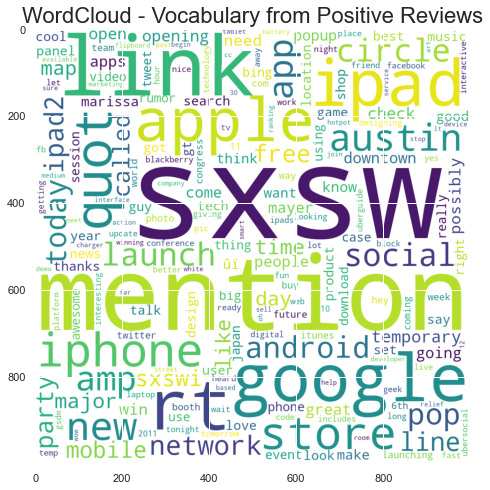

In [56]:
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(pos_words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Positive Reviews", fontsize = 22);

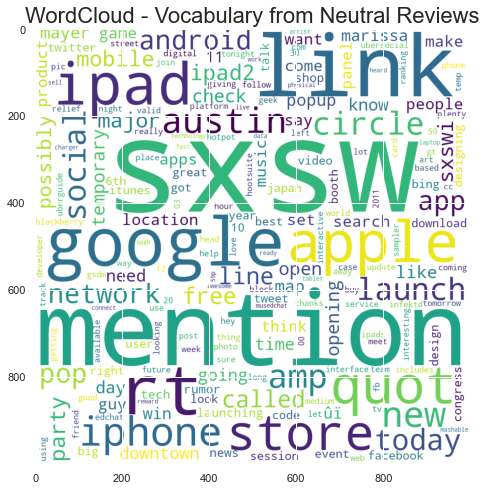

In [57]:
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(neutral_words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Neutral Reviews", fontsize = 22);

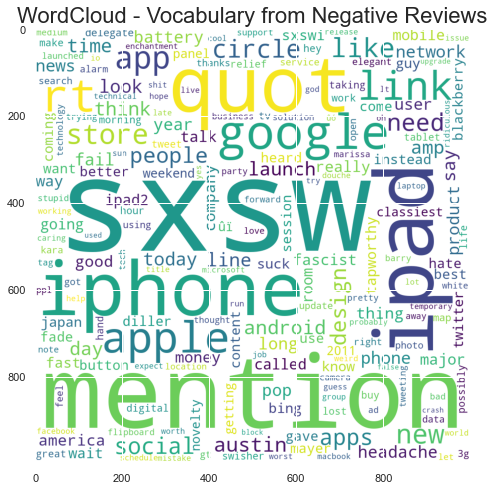

In [58]:
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(neg_words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Negative Reviews", fontsize = 22);

### Bigrams

In [60]:
import nltk
from nltk.corpus import gutenberg, stopwords
from nltk.collocations import *
from nltk import FreqDist
from nltk import word_tokenize
import string
import re

In [61]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [128]:
twitter_finder = BigramCollocationFinder.from_words(clean_df.joined_tokens)

In [129]:
twitter_scored = twitter_finder.score_ngrams(bigram_measures.raw_freq)

In [130]:
twitter_scored[:20]

[(('rt mention marissa mayer google connect digital amp physical world mobile link sxsw',
   'rt mention marissa mayer google connect digital amp physical world mobile link sxsw'),
  0.0008801848388161514),
 (('rt mention google launch major new social network called circle possibly today link sxsw',
   'rt mention google launch major new social network called circle possibly today link sxsw'),
  0.0007701617339641324),
 (('win free ipad webdoc com sxsw rt', 'win free ipad webdoc com sxsw rt'),
  0.0005501155242600946),
 (('google launch major new social network called circle possibly today link sxsw',
   'google launch major new social network called circle possibly today link sxsw'),
  0.00033006931455605677),
 (('even begin apple win sxsw link', 'even begin apple win sxsw link'),
  0.00022004620970403785),
 (('marissa mayer google connect digital amp physical world mobile link sxsw',
   'marissa mayer google connect digital amp physical world mobile link sxsw'),
  0.0002200462097040

In [67]:
twitter_pmi_finder = BigramCollocationFinder.from_words(clean_df.joined_tokens)

In [68]:
twitter_pmi_finder.apply_freq_filter(5)

In [69]:
twitter_pmi_scored = twitter_pmi_finder.score_ngrams(bigram_measures.pmi)

In [70]:
twitter_pmi_scored

[(('win free ipad webdoc com sxsw rt', 'win free ipad webdoc com sxsw rt'),
  9.857124108797201),
 (('rt mention marissa mayer google connect digital amp physical world mobile link sxsw',
   'rt mention marissa mayer google connect digital amp physical world mobile link sxsw'),
  9.506049668250325),
 (('rt mention google launch major new social network called circle possibly today link sxsw',
   'rt mention google launch major new social network called circle possibly today link sxsw'),
  8.342550935967445)]

### Modeling

In [88]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [78]:
# Random Forest Baseline
rf1 = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('rf', RandomForestClassifier()),
              ])
rf1.fit(X_train, y_train)

y_pred = rf1.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.700835899692037


In [84]:
import importlib
import matplotlib as mpl
importlib.reload(mpl); importlib.reload(plt); importlib.reload(sns)

<module 'seaborn' from '/Users/sallypants/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/__init__.py'>

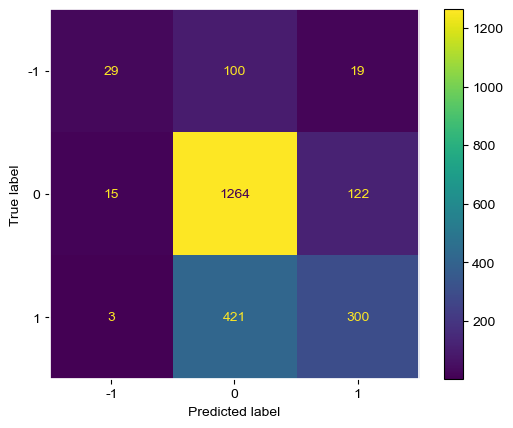

In [85]:
plot_confusion_matrix(rf1, X_test, y_test);

In [89]:
from sklearn.model_selection import GridSearchCV
dt_param_grid1 = {
   
    'max_depth': [10, 20,30],
    'min_samples_split': [8,10,12],
    'min_samples_leaf': [3,4,5],
}


# 'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
#           'max_features': ['auto'],
#     'max_leaf_nodes': [30, 40, 50],
#     'n_estimators': [100]
#          'criterion': ['gini'],

In [91]:
grid_search1 = GridSearchCV(estimator = rf, param_grid = dt_param_grid1, cv = 3)

In [114]:
# Grid Search Random Forest
rf2 = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('gs1', grid_search1),
              ])
rf2.fit(X_train, y_train)

y_pred = rf2.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.6515618125824901


In [115]:
grid_search1.best_params_

{'max_depth': 30, 'min_samples_leaf': 3, 'min_samples_split': 8}

In [116]:
dt_param_grid2 = {
   
    'max_depth': [30, 35, 40],
    'min_samples_split': [4,6,8],
    'min_samples_leaf': [2,3],}

In [117]:
grid_search2= GridSearchCV(estimator = rf, param_grid = dt_param_grid2, cv = 3)

In [118]:
# Grid Search 2 Random Forest
rf3 = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('gs2', grid_search2),
              ])
rf3.fit(X_train, y_train)

y_pred = rf3.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.6638803343598768


In [119]:
grid_search2.best_params_

{'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 4}

In [121]:
dt_param_grid3 = {
   
    'max_depth': [40],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [2],
    'criterion':['gini','entropy'],
    'n_estimators': [100, 200, 400],
    'max_leaf_nodes': [30, 40, 50],
}


In [122]:
grid_search3= GridSearchCV(estimator = rf, param_grid = dt_param_grid3, cv = 3)

In [123]:
# Grid Search 3 Random Forest
rf4 = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('gs3', grid_search3),
              ])
rf4.fit(X_train, y_train)

y_pred = rf4.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.645842498900132


In [124]:
grid_search3.best_params_

{'criterion': 'gini',
 'max_depth': 40,
 'max_leaf_nodes': 50,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 200}

### 3-D Graph

In [142]:
def count_vectorize(tweet, vocab=None):
    if vocab:
        unique_words = vocab
    else:
        unique_words = list(set(tweet))
    
    tweet_dict = {i:0 for i in unique_words}
   
    for word in tweet:
        tweet_dict[word] += 1
    
    return tweet_dict

test_vectorized = count_vectorize(clean_df.joined_tokens)
print(test_vectorized)


{'dear apple could roll hot dog cart full ipad austin convention center bring hot dog sxsw': 1, 'rt mention sxsw friend forget download sxswgo iphone ipad app link': 1, 'rt mention trying steve wozniak drink free thanks google h4ckers sxsw mention speakeasy link': 1, 'rt mention get owle bubo iphone 20 coupon use code sbsw2011 sxsw sxswfilm sxswi almedia': 1, 'rt mention join actsofsharing com tonight person friend city end sxsw win ipad': 1, 'rt mention apple pop store sxsw selling new ipad link': 1, 'omfg mean please link webber ipad sxsw dionne warwick': 1, 'rt mention sxsw bound keep eye may give away mention iphone case atx land': 1, 'sxsw day would spend entire day night line apple store': 1, 'marketing genius apple open pop store outside sxsw link': 1, 'mention ipad app getting panned design trumping content rightfully sxsw': 1, 'use glass lie lie phone face people handsfree connection think apple sxsw arsxsw': 1, 'diabetes plate thanks google already covered link sxsw': 1, 'rt 